In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar datos

datos = pd.read_csv('D:\Cursos\CienciaDeDatosPython\Datos\datosModificados.csv')
datos.head(5)

,indice,nombre,localizacion,año,kilometros recorridos,combustible,transmision,tipo propietario,kilometraje,motor,potencia,asientos,nuevo precio,precio
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,"26,6",998.0,124.424709,5.0,NaN,1750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,"19,67",1582.0,124.424709,5.0,NaN,12500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,"18,2",1199.0,124.424709,5.0,"8,61",4500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,"20,77",1248.0,124.424709,7.0,NaN,6000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,"15,2",1968.0,124.424709,5.0,NaN,17740


In [ ]:
datos.info()
columnas_nulas = [col for col in datos.columns if datos[col].isnull().any()]
print(columnas_nulas)

#imprime las colummnas que tienen valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   indice                 6019 non-null   int64  
 1   nombre                 6019 non-null   object 
 2   localizacion           6019 non-null   object 
 3   año                    6019 non-null   int64  
 4   kilometros recorridos  6019 non-null   int64  
 5   combustible            6019 non-null   object 
 6   transmision            6019 non-null   object 
 7   tipo propietario       6019 non-null   object 
 8   kilometraje            6017 non-null   object 
 9   motor                  6019 non-null   float64
 10  potencia               6019 non-null   float64
 11  asientos               6019 non-null   float64
 12  nuevo precio           824 non-null    object 
 13  precio                 6019 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 658.5+ 

In [13]:
dt = pd.get_dummies(datos['combustible'])
dt = dt.astype('float64')
dt

,CNG,Diesel,Electric,LPG,Petrol
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
6014,0.0,1.0,0.0,0.0,0.0
6015,0.0,1.0,0.0,0.0,0.0
6016,0.0,1.0,0.0,0.0,0.0
6017,0.0,0.0,0.0,0.0,1.0


In [14]:
datos = pd.concat([datos, dt], axis=1)
datos

,indice,nombre,localizacion,año,kilometros recorridos,combustible,transmision,tipo propietario,kilometraje,motor,potencia,asientos,nuevo precio,precio,CNG,Diesel,Electric,LPG,Petrol
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,"26,6",998.0,124.424709,5.0,NaN,1750,1.0,0.0,0.0,0.0,0.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,"19,67",1582.0,124.424709,5.0,NaN,12500,0.0,1.0,0.0,0.0,0.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,"18,2",1199.0,124.424709,5.0,"8,61",4500,0.0,0.0,0.0,0.0,1.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,"20,77",1248.0,124.424709,7.0,NaN,6000,0.0,1.0,0.0,0.0,0.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,"15,2",1968.0,124.424709,5.0,NaN,17740,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,"28,4",1248.0,74.000000,5.0,"7,88",4750,0.0,1.0,0.0,0.0,0.0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,"24,4",1120.0,71.000000,5.0,NaN,4000,0.0,1.0,0.0,0.0,0.0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14,2498.0,112.000000,8.0,NaN,2900,0.0,1.0,0.0,0.0,0.0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,"18,9",998.0,124.424709,5.0,NaN,2650,0.0,0.0,0.0,0.0,1.0


In [19]:
X = datos[['motor', 'potencia','asientos','CNG','Diesel','Electric','LPG','Petrol']]
print(X)

         motor  potencia  asientos  CNG  Diesel  Electric  LPG  Petrol
0     0.166389  0.222187       5.0  1.0     0.0       0.0  0.0     0.0
1     0.263755  0.222187       5.0  0.0     1.0       0.0  0.0     0.0
2     0.199900  0.222187       5.0  0.0     0.0       0.0  0.0     1.0
3     0.208069  0.222187       7.0  0.0     1.0       0.0  0.0     0.0
4     0.328109  0.222187       5.0  0.0     1.0       0.0  0.0     0.0
...        ...       ...       ...  ...     ...       ...  ...     ...
6014  0.208069  0.132143       5.0  0.0     1.0       0.0  0.0     0.0
6015  0.186729  0.126786       5.0  0.0     1.0       0.0  0.0     0.0
6016  0.416472  0.200000       8.0  0.0     1.0       0.0  0.0     0.0
6017  0.166389  0.222187       5.0  0.0     0.0       0.0  0.0     1.0
6018  0.156052  0.222187       5.0  0.0     1.0       0.0  0.0     0.0

[6019 rows x 8 columns]


In [ ]:
# Normalizar la colummna potencia y motor

datos['potencia'] = datos['potencia']/datos['potencia'].max()
datos['motor'] = datos['motor']/datos['motor'].max()

In [20]:
#modelo

model  = LinearRegression()

y = datos['precio']

# Division de datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
model.fit(X_train, y_train)
predicciones = model.predict(X_test)

print(':'*100)
print('score: ' ,model.score(X_test, y_test))


# Presentar mejor y comparar resultados:

print(':'*30,'   COMPARACION DE LOS RESULTADOS    ',':'*30)
resultado = {'Real' :y_test,'predicciones':predicciones}
R = pd.DataFrame(data = resultado)
print(R)

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
score:  0.5139638497426197
::::::::::::::::::::::::::::::    COMPARACION DE LOS RESULTADOS     ::::::::::::::::::::::::::::::
       Real  predicciones
5150   7250  12630.773561
2164   4250   7480.657676
1136   3900   8680.565353
5641   8410  19903.083636
1515  13480  11975.924090
...     ...           ...
5899   4990   7480.657676
4139  38150  22604.157155
728    8500   7480.657676
3619   6250   7591.754354
3828   3870   2212.381201

[1204 rows x 2 columns]


In [53]:
# Metricas
from sklearn import metrics

print(':'*30,'   METRICAS    ',':'*30,'\n')
ECM = metrics.mean_squared_error(y_test, predicciones)
print('Error cuadratico medio: ',ECM)
r_cuadrado = metrics.r2_score(y_test, predicciones)

print('Coeficiente de determinacion (R^2): ',r_cuadrado)


::::::::::::::::::::::::::::::    METRICAS     :::::::::::::::::::::::::::::: 

Error cuadratico medio:  58265515.72521199
Coeficiente de determinacion (R^2):  0.5139638497426197


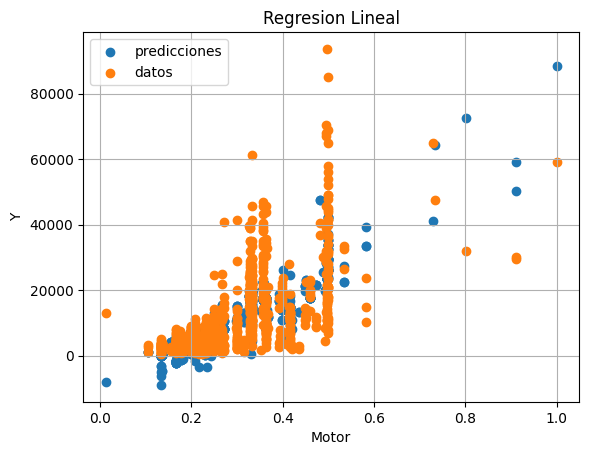

In [59]:
#plt.plot(X_test['motor'], predicciones,'r',label='predicciones')
plt.scatter(X_test['motor'], predicciones,label='predicciones')
plt.scatter(X_test['motor'],y_test,label='datos')
plt.title('Regresion Lineal')
plt.xlabel('Motor')
plt.ylabel('Y')
plt.legend()
plt.grid()    
plt.show()